In [47]:
!pip install opencv-python

In [48]:
import cv2

import matplotlib.pyplot as plt
import time
import os
import numpy as np

print(cv2.__version__)

4.1.2


In [49]:
!git clone https://github.com/star-bits/opencv-dnn-face-detection-caffemodel.git

fatal: destination path 'opencv-dnn-face-detection-caffemodel' already exists and is not an empty directory.


In [50]:
modelFile = "opencv-dnn-face-detection-caffemodel/res10_300x300_ssd_iter_140000_fp16.caffemodel"
configFile = "opencv-dnn-face-detection-caffemodel/deploy.prototxt.txt" 
net = cv2.dnn.readNetFromCaffe(configFile, modelFile)

In [51]:
def opencv_dnn_face_detection(img_orig, img_size_divisor):

    img_h, img_w = img_orig.shape[:2]
    print(f'Input image size: {(img_h, img_w)}')

    start = time.time()

    blob = cv2.dnn.blobFromImage(
        img_orig,
        scalefactor=1.0,
        # size=(300, 300), 
        size=(img_w//img_size_divisor, img_h//img_size_divisor),
        mean=(104.0, 117.0, 123.0),
    )
    net.setInput(blob)
    print(f'Input blob size: {(img_h//img_size_divisor, img_w//img_size_divisor)}\n')

    cropped_faces_array = np.empty((0, 150, 150, 3), int)
    print(f'Empty cropped_faces_array shape: {cropped_faces_array.shape}\n')

    faces = net.forward()
    # print(faces.shape) # (1, 1, 200, 7)
    for face in faces[0][0]:
        confidence = face[2]
        if confidence > 0.5:
            print(f'Model output per face: {face}')
            print(f'Confidence: {confidence*100:.2f}%')
            x0 = int(face[3] * img_w)
            y0 = int(face[4] * img_h)
            x1 = int(face[5] * img_w)
            y1 = int(face[6] * img_h)

            cropped_face = img_orig[y0:y1, x0:x1, :]
            cropped_face = cv2.cvtColor(cropped_face, cv2.COLOR_RGB2BGR)
            cropped_face_resized = cv2.resize(cropped_face, (150, 150))
            print(f'New cropped_face_resized shape: {cropped_face_resized.shape}')
            cropped_face_resized = np.expand_dims(cropped_face_resized, axis=0)
            print(f'Dim expanded cropped_face_resized shape: {cropped_face_resized.shape}')
            cropped_faces_array = np.append(cropped_faces_array, cropped_face_resized, axis=0)
            print(f'Appended cropped_faces_array shape: {cropped_faces_array.shape}\n')

            img_bbox = cv2.rectangle(img_orig, (x0, y0), (x1, y1), (0, 0, 255), 2)

    end = time.time()
    t_elapsed = end-start

    return img_bbox, cropped_faces_array, t_elapsed

In [52]:
img_file = 'test_2.jpg'
img_orig = cv2.imread(img_file)

img_size_divisor = 4

Input image size: (5917, 803)
Input blob size: (1479, 200)

Empty cropped_faces_array shape: (0, 150, 150, 3)

Model output per face: [0.         1.         0.986227   0.5242484  0.33141983 0.8665467
 0.39596295]
Confidence: 98.62%
New cropped_face_resized shape: (150, 150, 3)
Dim expanded cropped_face_resized shape: (1, 150, 150, 3)
Appended cropped_faces_array shape: (1, 150, 150, 3)

Model output per face: [0.         1.         0.98267937 0.33440214 0.88281506 0.5146854
 0.92567855]
Confidence: 98.27%
New cropped_face_resized shape: (150, 150, 3)
Dim expanded cropped_face_resized shape: (1, 150, 150, 3)
Appended cropped_faces_array shape: (2, 150, 150, 3)

Model output per face: [0.         1.         0.9699274  0.35844764 0.6491247  0.5726783
 0.6875786 ]
Confidence: 96.99%
New cropped_face_resized shape: (150, 150, 3)
Dim expanded cropped_face_resized shape: (1, 150, 150, 3)
Appended cropped_faces_array shape: (3, 150, 150, 3)

Model output per face: [0.         1.         0.9534

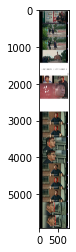

Time elapsed: 0.328 s


In [53]:
img_bbox, cropped_faces_array, t_elapsed = opencv_dnn_face_detection(img_orig, img_size_divisor)

plt.imshow(cv2.cvtColor(img_bbox, cv2.COLOR_RGB2BGR))
plt.show()

img_name, img_ext = os.path.splitext(img_file)
cv2.imwrite(img_name + '_ssd_' + str(img_size_divisor) + '.jpg', img_bbox)

print(f'Time elapsed: {t_elapsed:.3f} s')

12


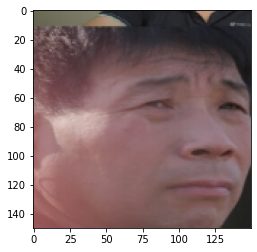

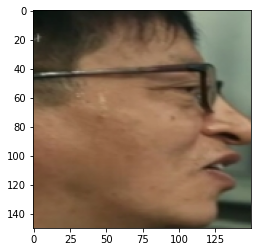

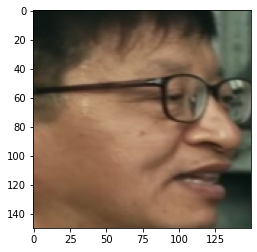

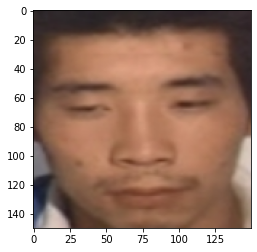

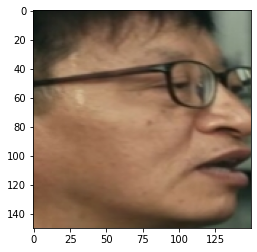

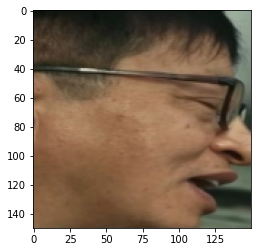

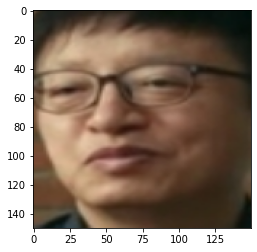

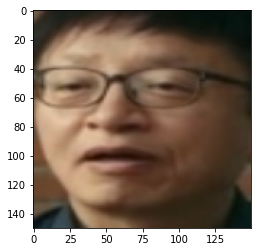

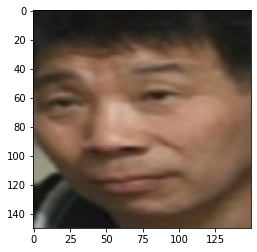

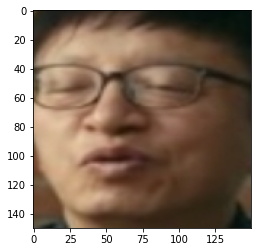

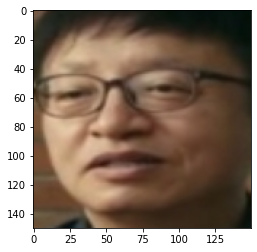

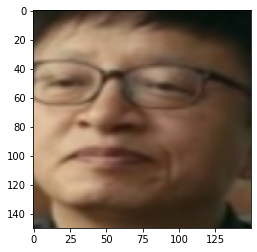

In [54]:
print(len(cropped_faces_array))

for i in range(len(cropped_faces_array)):
    plt.imshow(cropped_faces_array[i, :, :, :])
    plt.show()